In [1]:
import pandas as pd

# Load the dataset
disney_data = pd.read_csv("D:\mainflow\disney_plus_titles.csv")

# Display the first few rows of the dataset to understand its structure
disney_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [2]:
import matplotlib.pyplot as plt

# Convert 'date_added' to datetime format
disney_data['date_added'] = pd.to_datetime(disney_data['date_added'])

# Create a time series object by setting 'date_added' as the index
time_series_data = disney_data.set_index('date_added')

# Count the number of shows/movies added each month
monthly_additions = time_series_data.resample('M').size()

# Display the first few rows of the monthly additions to verify the data
monthly_additions.head()


date_added
2019-10-31      9
2019-11-30    731
2019-12-31     25
2020-01-31     44
2020-02-29     20
dtype: int64

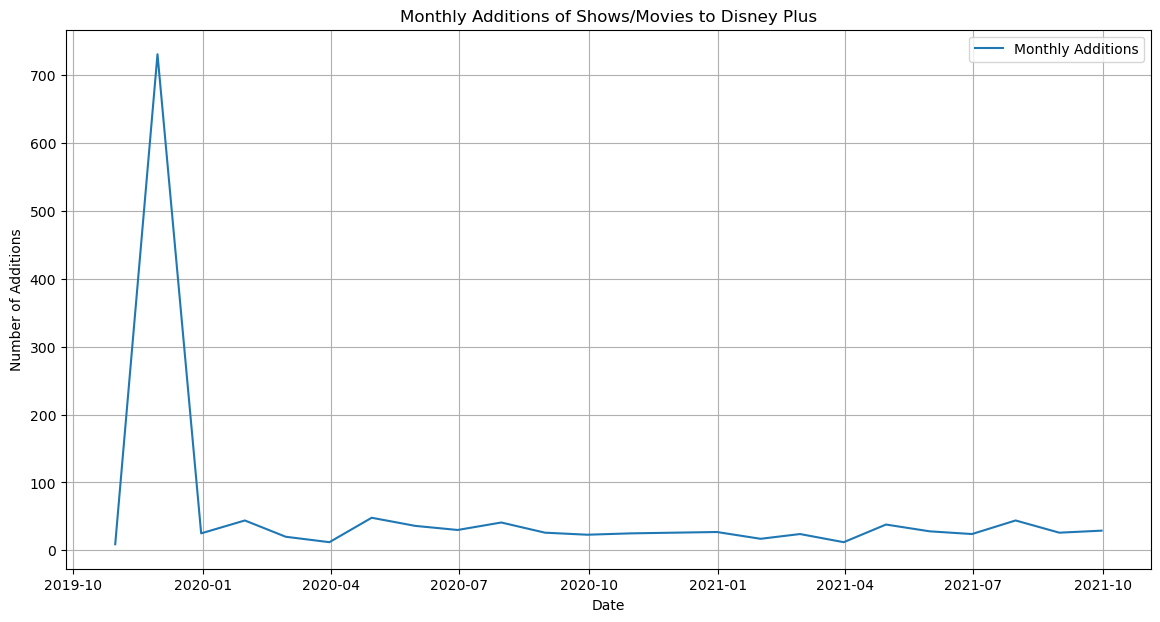

In [3]:
# Plot the time series data to visualize the trend
plt.figure(figsize=(14, 7))
plt.plot(monthly_additions, label='Monthly Additions')
plt.title('Monthly Additions of Shows/Movies to Disney Plus')
plt.xlabel('Date')
plt.ylabel('Number of Additions')
plt.legend()
plt.grid(True)
plt.show()


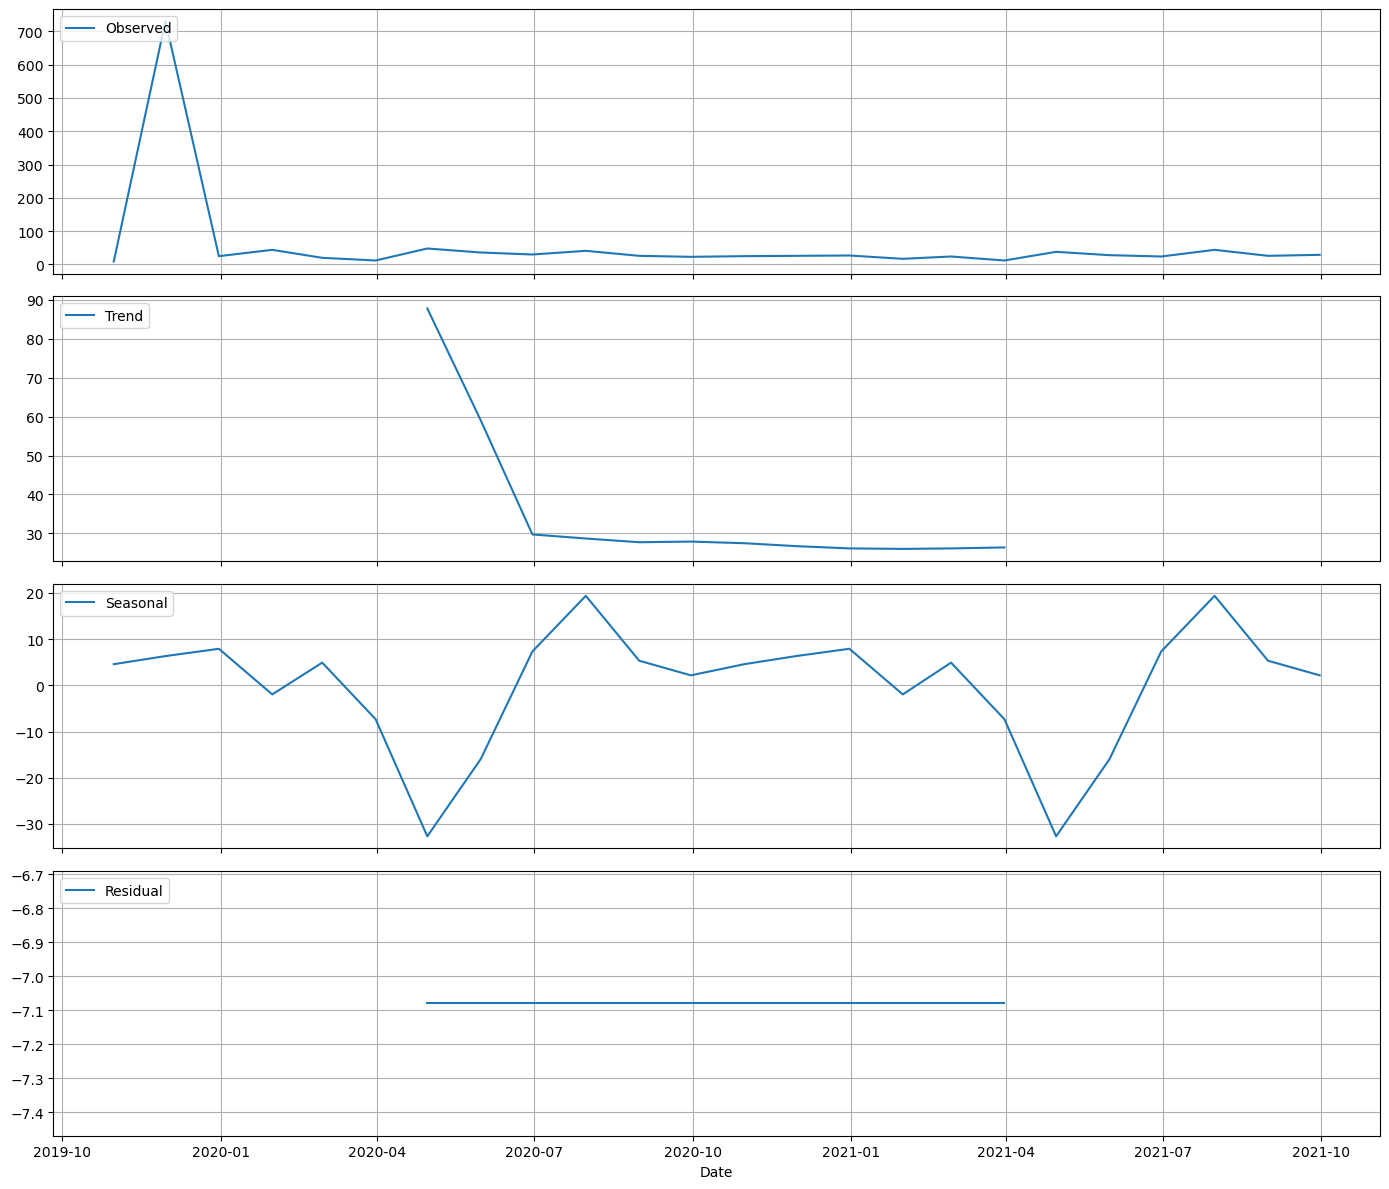

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
decomposition = seasonal_decompose(monthly_additions, model='additive')

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

ax1.plot(decomposition.observed, label='Observed')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2.plot(decomposition.trend, label='Trend')
ax2.legend(loc='upper left')
ax2.grid(True)

ax3.plot(decomposition.seasonal, label='Seasonal')
ax3.legend(loc='upper left')
ax3.grid(True)

ax4.plot(decomposition.resid, label='Residual')
ax4.legend(loc='upper left')
ax4.grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


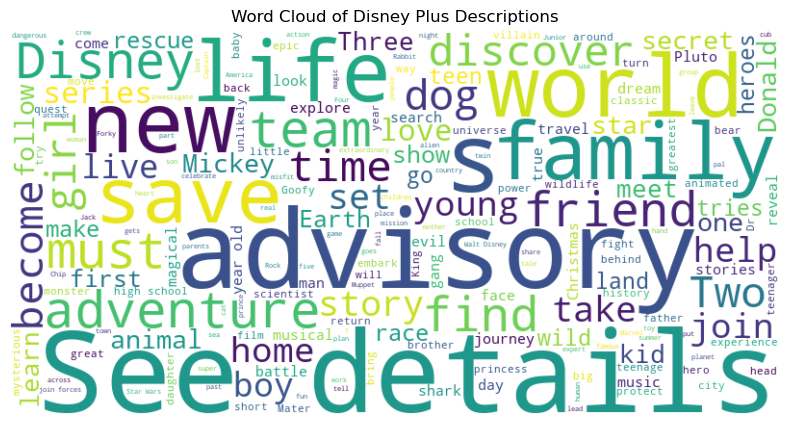

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into a single text
text = ' '.join(disney_data['description'].dropna().tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disney Plus Descriptions')
plt.show()


In [6]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Combine all descriptions into a single text
text = ' '.join(disney_data['description'].dropna().tolist())

# Tokenize the text
tokens = word_tokenize(text.lower())

# Remove stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Get the most common words
word_freq = Counter(filtered_tokens)

# Display the 20 most common words
common_words = word_freq.most_common(20)
common_words


[nltk_data] Downloading package stopwords to C:\Users\Bhupesh
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Bhupesh
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('see', 128),
 ('details', 122),
 ('advisory', 121),
 ('world', 70),
 ('new', 70),
 ('disney', 62),
 ('family', 61),
 ('life', 60),
 ('save', 56),
 ('must', 55),
 ('friends', 50),
 ('two', 48),
 ('team', 48),
 ('story', 42),
 ('young', 41),
 ('time', 37),
 ('boy', 37),
 ('mickey', 35),
 ('school', 35),
 ('adventure', 34)]

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Select relevant features
selected_features = disney_data[['type', 'release_year', 'rating', 'duration', 'listed_in']]

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
selected_features_imputed = imputer.fit_transform(selected_features)

# Convert to DataFrame
selected_features_df = pd.DataFrame(selected_features_imputed, columns=selected_features.columns)

# Convert duration to numeric (separating movies and TV shows)
selected_features_df['duration'] = selected_features_df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else int(x.split()[0]) * 60)  # Convert seasons to minutes

# Encode categorical variables
label_encoders = {}
for column in ['type', 'rating', 'listed_in']:
    le = LabelEncoder()
    selected_features_df[column] = le.fit_transform(selected_features_df[column])
    label_encoders[column] = le

# Standardize numerical features
scaler = StandardScaler()
selected_features_df[['release_year', 'duration']] = scaler.fit_transform(selected_features_df[['release_year', 'duration']])

# Display the first few rows of the prepared data
selected_features_df.head()


,type,release_year,rating,duration,listed_in
0,0,0.843208,5,-0.003354,254
1,0,0.391118,0,0.054148,212
2,0,0.526745,2,0.445161,233
3,1,0.752790,5,0.364658,85
4,1,0.843208,6,-0.325365,14


C:\Users\Bhupesh Gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bhupesh Gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Silhouette Score: 0.6622160699740817


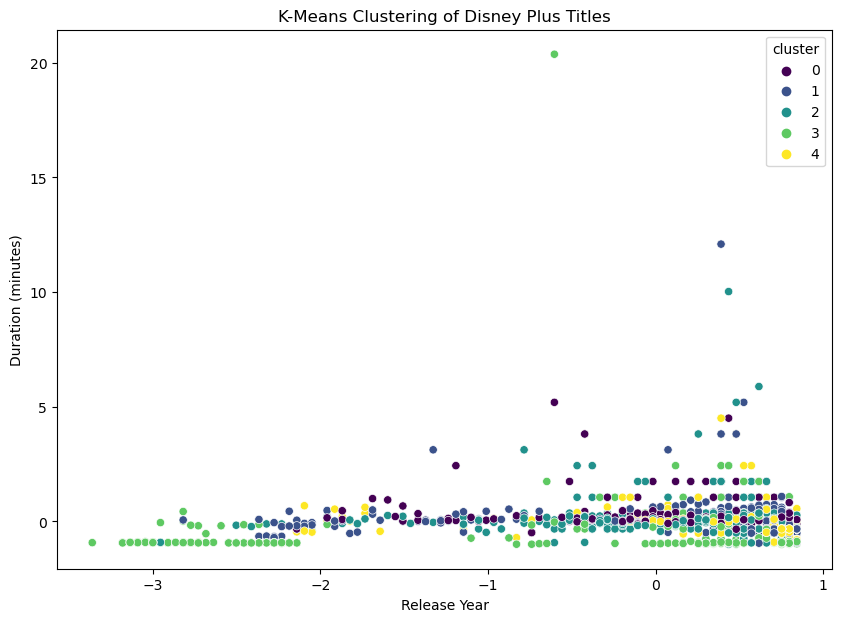

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
disney_data = pd.read_csv("D:\mainflow\disney_plus_titles.csv")

# Select relevant features
selected_features = disney_data[['type', 'release_year', 'rating', 'duration', 'listed_in']]

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
selected_features_imputed = imputer.fit_transform(selected_features)

# Convert to DataFrame
selected_features_df = pd.DataFrame(selected_features_imputed, columns=selected_features.columns)

# Convert duration to numeric (separating movies and TV shows)
selected_features_df['duration'] = selected_features_df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else int(x.split()[0]) * 60)  # Convert seasons to minutes

# Encode categorical variables
label_encoders = {}
for column in ['type', 'rating', 'listed_in']:
    le = LabelEncoder()
    selected_features_df[column] = le.fit_transform(selected_features_df[column])
    label_encoders[column] = le

# Standardize numerical features
scaler = StandardScaler()
selected_features_df[['release_year', 'duration']] = scaler.fit_transform(selected_features_df[['release_year', 'duration']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(selected_features_df)

# Add cluster labels to the DataFrame
selected_features_df['cluster'] = clusters

# Evaluate clustering performance
silhouette_avg = silhouette_score(selected_features_df, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=selected_features_df, x='release_year', y='duration', hue='cluster', palette='viridis')
plt.title('K-Means Clustering of Disney Plus Titles')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()
